<a href="https://colab.research.google.com/github/Mrinal7862/Decision_TreeRegressor/blob/main/DecisionTree_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()

In [ ]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Price'] = data.target

In [ ]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [ ]:
df.shape

(20640, 9)

In [ ]:
df = df.sample(frac = 0.20)

In [ ]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
13307,4.4946,24.0,5.294896,1.047259,2064.0,3.901701,34.08,-117.62,1.360
2685,3.0091,41.0,5.648837,1.055814,1188.0,2.762791,32.97,-115.54,0.708
68,1.8516,52.0,6.975610,1.329268,274.0,3.341463,37.81,-122.30,0.850
4766,2.1078,43.0,4.707521,1.055710,1017.0,2.832869,34.03,-118.36,1.335
4722,4.0050,48.0,5.702703,1.054054,539.0,2.427928,34.05,-118.37,2.750
...,...,...,...,...,...,...,...,...,...
2880,1.3750,35.0,4.050847,1.031477,1041.0,2.520581,35.38,-118.97,0.575
7428,2.2950,32.0,3.695364,1.086093,1265.0,4.188742,33.95,-118.21,1.552
6841,2.2261,23.0,3.639144,1.061162,965.0,2.951070,34.06,-118.12,2.118
17183,8.2364,11.0,6.040323,1.104839,355.0,2.862903,37.51,-122.50,3.718


In [ ]:
# dependent features and independent features

X = df.iloc[:, :-1]
Y = df.iloc[:,-1]

In [ ]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
13307,4.4946,24.0,5.294896,1.047259,2064.0,3.901701,34.08,-117.62
2685,3.0091,41.0,5.648837,1.055814,1188.0,2.762791,32.97,-115.54
68,1.8516,52.0,6.975610,1.329268,274.0,3.341463,37.81,-122.30
4766,2.1078,43.0,4.707521,1.055710,1017.0,2.832869,34.03,-118.36
4722,4.0050,48.0,5.702703,1.054054,539.0,2.427928,34.05,-118.37
...,...,...,...,...,...,...,...,...
2880,1.3750,35.0,4.050847,1.031477,1041.0,2.520581,35.38,-118.97
7428,2.2950,32.0,3.695364,1.086093,1265.0,4.188742,33.95,-118.21
6841,2.2261,23.0,3.639144,1.061162,965.0,2.951070,34.06,-118.12
17183,8.2364,11.0,6.040323,1.104839,355.0,2.862903,37.51,-122.50


In [ ]:
# Train Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=1)

In [ ]:
X_train.shape

(2889, 8)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()

In [ ]:
model

DecisionTreeRegressor()

In [ ]:
model.fit(X_train, Y_train)

DecisionTreeRegressor()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print(y_pred)

[1.599 0.741 2.208 ... 0.961 2.125 3.202]


In [ ]:
from sklearn.metrics import r2_score

r2_score(y_pred, Y_test)

0.4543509117505551

In [ ]:
# hyper parameter tuning
parameter = {
    'criterion': ['squared_error', 'absolute_error', 'poisson'],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [1,2,3,4,5,6],
    'splitter': ['best', 'random']
}
regressor = DecisionTreeRegressor()

In [ ]:
from sklearn.model_selection import GridSearchCV
model = GridSearchCV(regressor, param_grid=parameter, cv = 3, scoring='neg_mean_squared_error')

In [ ]:
model.fit(X_train, Y_train)

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'poisson'],
                         'max_depth': [1, 2, 3, 4, 5, 6],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [ ]:
model.best_params_

{'criterion': 'poisson',
 'max_depth': 6,
 'max_features': 'log2',
 'splitter': 'best'}

In [ ]:
finalModel = DecisionTreeRegressor(criterion='poisson', max_depth=6, max_features='log2', splitter='best')

In [ ]:
finalModel.fit(X_train, Y_train)

DecisionTreeRegressor(criterion='poisson', max_depth=6, max_features='log2')

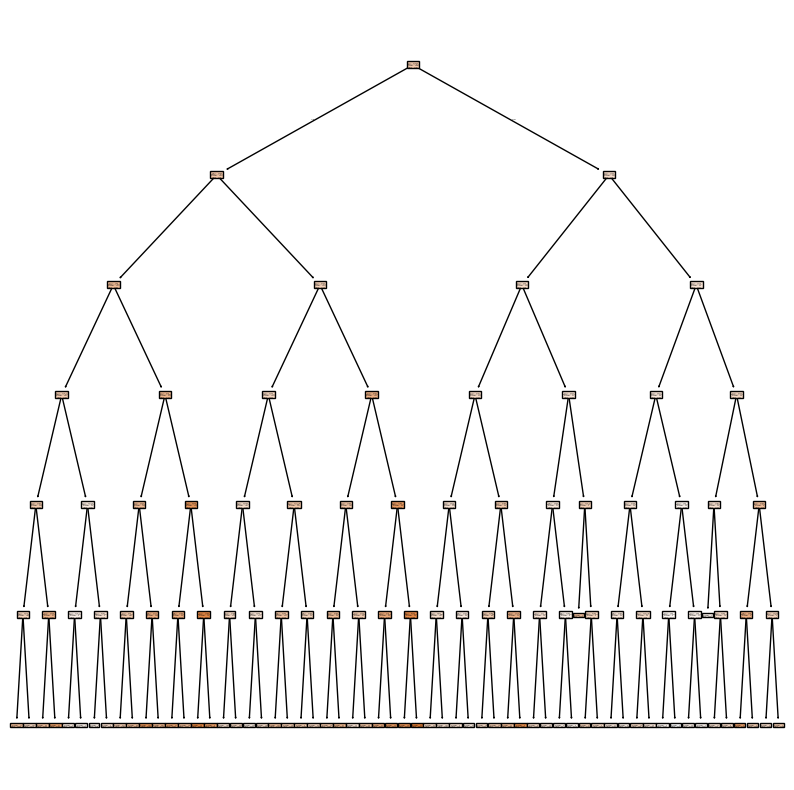

In [ ]:
from sklearn import tree
plt.figure(figsize=(10,10))
tree.plot_tree(finalModel, filled=True)
plt.show()

In [ ]:
y_prd2 = finalModel.predict(X_test)

In [ ]:
r2_score(y_prd2, Y_test)

0.25837279663026713